# Predicting sales for given store using Prophet

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [6]:
# Importing Data

In [7]:
# Reading Sales Train Data

In [8]:
sales_train_df = pd.read_csv("data/train.csv")

/tmp/ipykernel_18326/3500177654.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_train_df = pd.read_csv("data/train.csv")


In [9]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [10]:
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [11]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [12]:
# Reading Store Data

In [13]:
store_info_df = pd.read_csv("data/store.csv")

In [14]:
store_info_df.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [15]:
store_info_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [16]:
# Exploring Data

In [17]:
# Exploring sales data

In [18]:
# Checking for null or NaN values
sales_train_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [19]:
sales_train_df.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

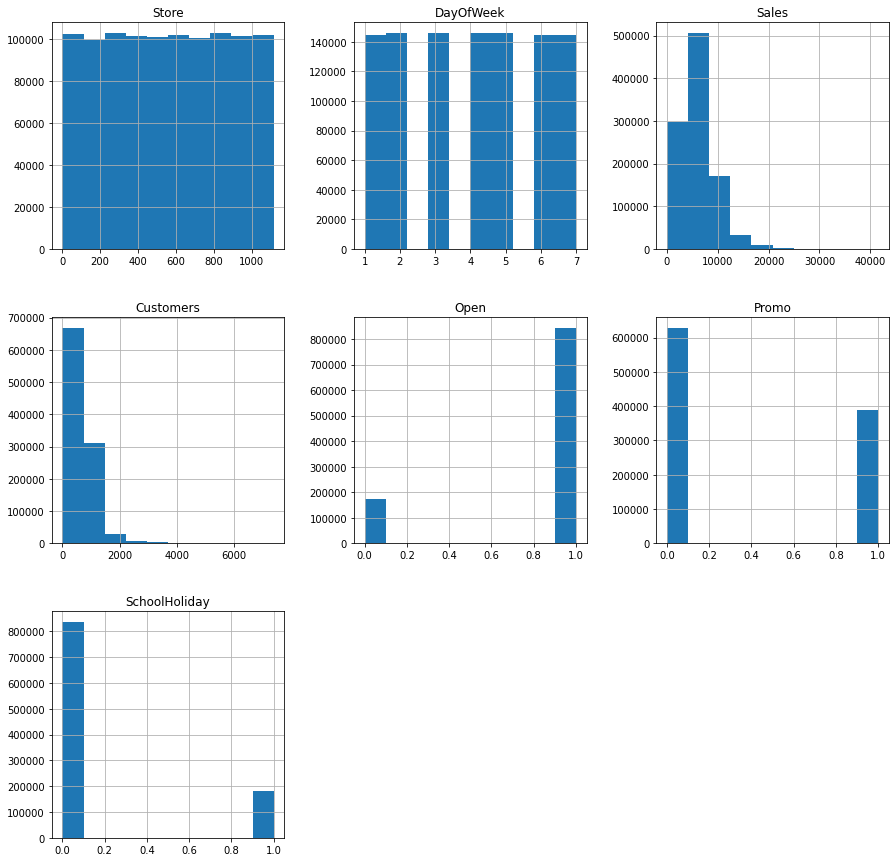

In [20]:
# Checking the distributions of features in sales data
sales_train_df.hist(figsize=(15,15));

In [21]:
# It is seen that few stores are closed, checking stores that are open
stores_open = sales_train_df[sales_train_df["Open"] == 1]
stores_closed = sales_train_df[sales_train_df["Open"] == 0]

In [22]:
print(f" Total Stores : {len(sales_train_df)}")
print(f" Open Stores : {len(stores_open)}")
print(f" Closed Stores : {len(stores_closed)}")


 Total Stores : 1017209
 Open Stores : 844392
 Closed Stores : 172817


In [23]:
# Since we are not interested in closed stores, Hence, considering Open stores
sales_train_df = sales_train_df[sales_train_df['Open'] == 1]

In [24]:
sales_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1


In [25]:
# Since it only stores that are opened are considered, dropping the column "Open"
sales_train_df = sales_train_df.drop('Open',axis=1)

In [26]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [27]:
# Exploring stores data

In [28]:
store_info_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [29]:
# Checking for null or NaN values
store_info_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [30]:
# It is seen that there are missing values 

In [31]:
# The column "CompetitionDistance" has only 3 NaN missing values, replacing them with mean
store_info_df['CompetitionDistance'] = store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].mean())

In [32]:
 store_info_df[store_info_df['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [33]:
store_info_df[ store_info_df['Promo2'] == 0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [34]:
#It is observed that when promo2 is 0, other features based on Promo are NaN, Hencing replacing all these with 0
# Also replacing the remaining missing values 0
str_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']

for cols in str_cols:
    store_info_df [cols].fillna(0, inplace = True)

In [35]:
store_info_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1112,1113,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1113,1114,a,c,870.0,0.0,0.0,0,0.0,0.0,0


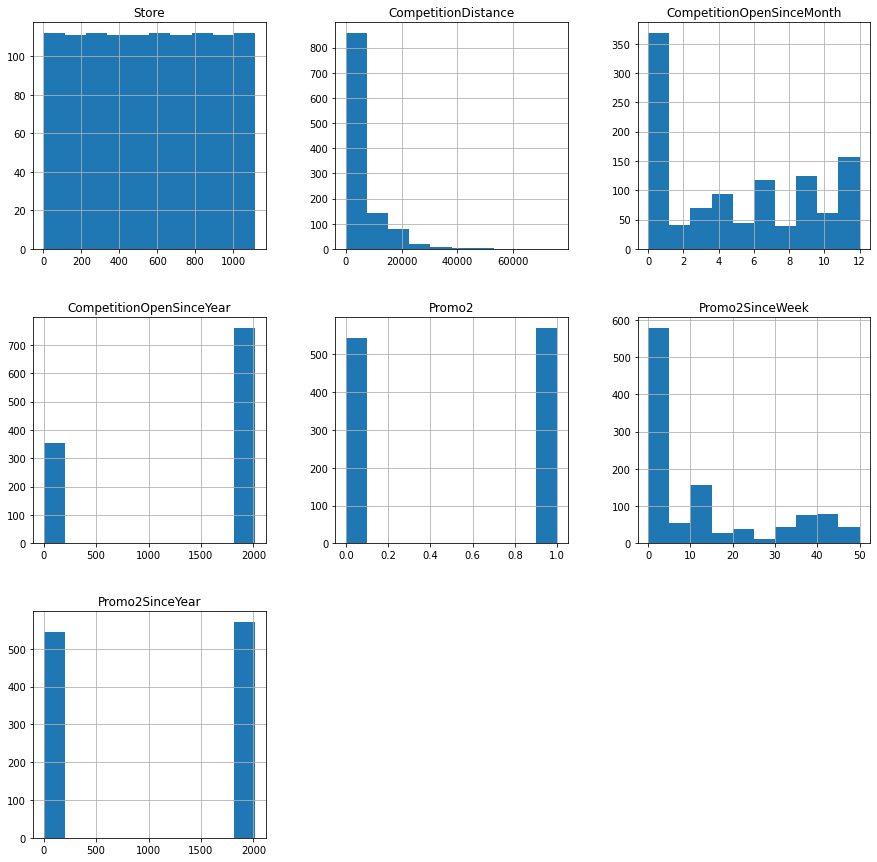

In [36]:
# Checking distributions of the store data
store_info_df.hist(figsize = (15,15));

In [37]:
# Merging sales data and stores data
sales_df= pd.merge(sales_train_df, store_info_df, how = 'inner', on = 'Store') 

In [38]:
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


<AxesSubplot:>

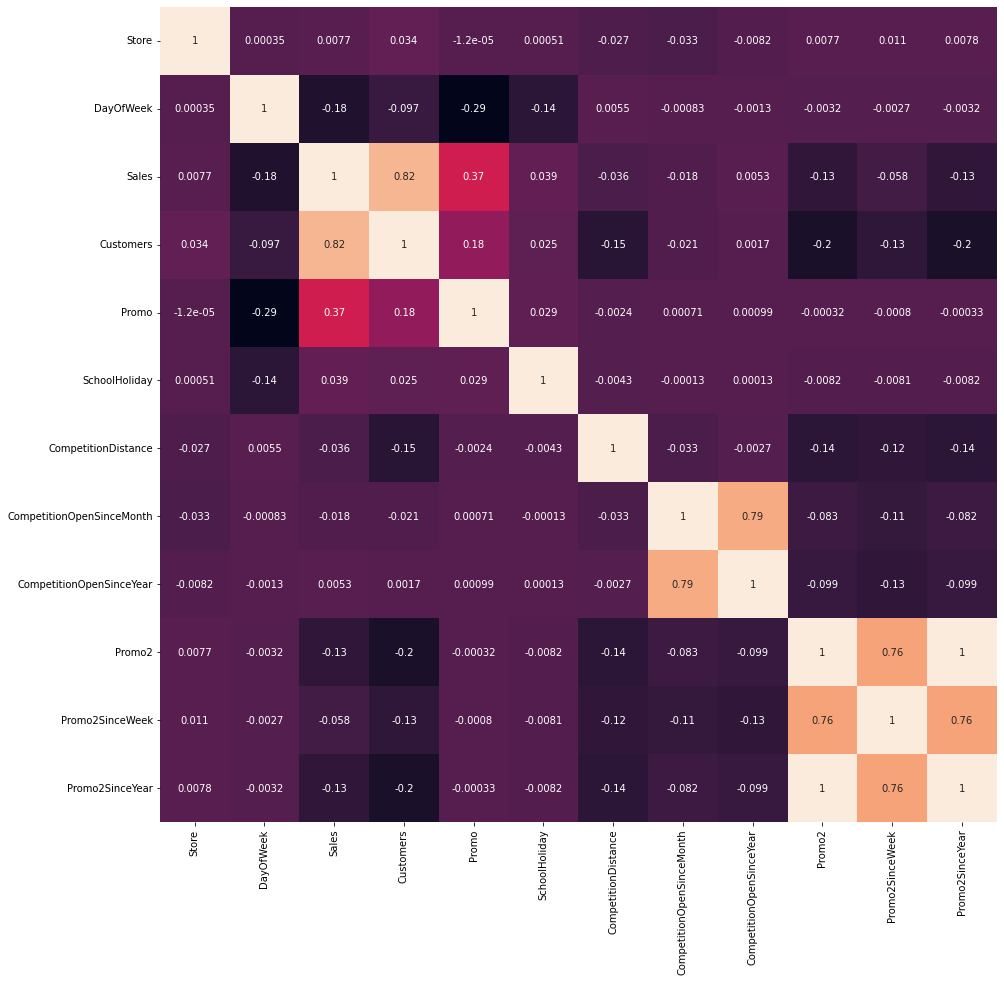

In [39]:
plt.figure(figsize=(15,15))
sns.heatmap(sales_df.corr(),annot=True,cbar=False)

In [40]:
# It is observed that the customers are highly correlated with promo and promo2 respectively

In [41]:
# Converting Date column to DateTime
sales_df["Date"] = pd.to_datetime(sales_df["Date"])

In [42]:
# Extracting year, month and day of month from Date column
sales_df['Year'] = sales_df['Date'].dt.year
sales_df['Month'] = sales_df['Date'].dt.month
sales_df['Day'] = sales_df['Date'].dt.day

In [43]:
sales_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,2013-01-07,9291,1002,1,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013,1,7
844388,292,6,2013-01-05,2748,340,0,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013,1,5
844389,292,5,2013-01-04,4202,560,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013,1,4
844390,292,4,2013-01-03,4580,662,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013,1,3


Text(0.5, 1.0, 'Average Customers Per Month')

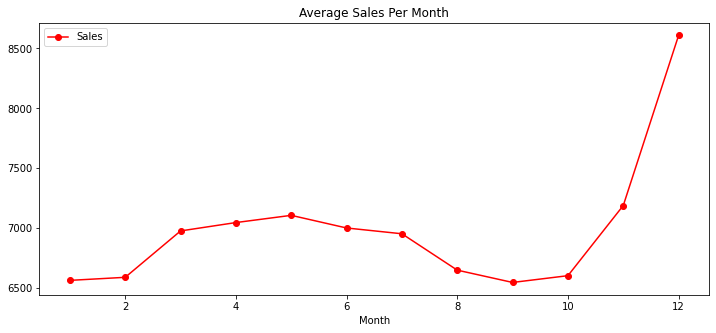

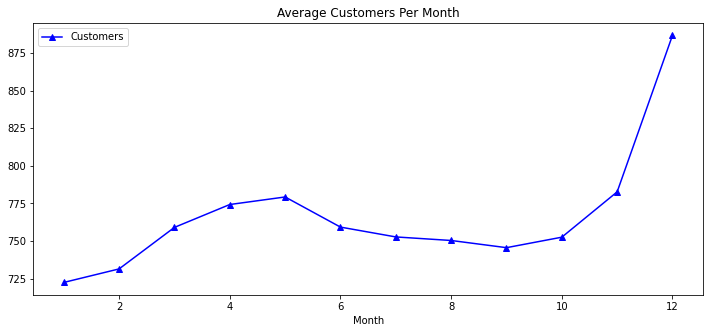

In [44]:
# Exploring Avg sales per month

axis = sales_df.groupby('Month')[['Sales']].mean().plot(figsize = (12,5), marker = 'o', color = 'r')
axis.set_title('Average Sales Per Month')
axis = sales_df.groupby('Month')[['Customers']].mean().plot(figsize = (12,5), marker = '^', color = 'b')
axis.set_title('Average Customers Per Month')

Text(0.5, 1.0, 'Average Customers Per Month')

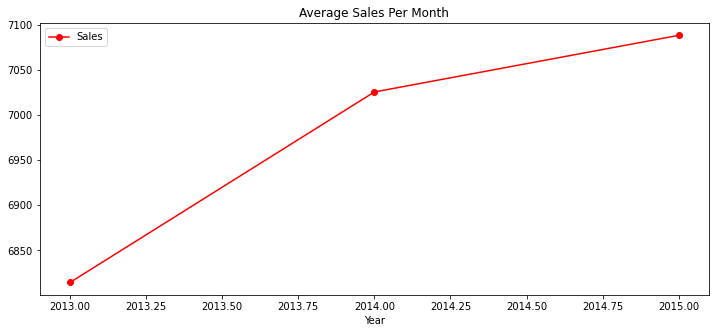

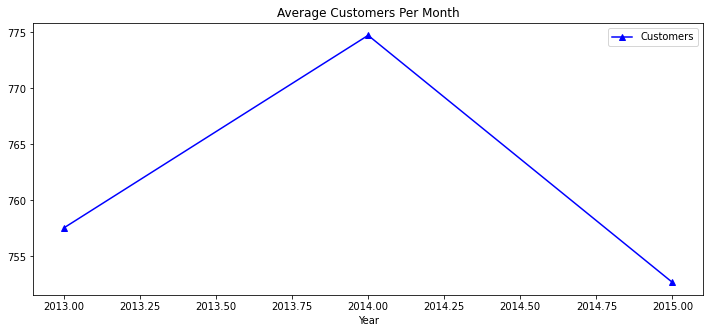

In [45]:
# Exploring Avg sales per YEAR


axis = sales_df.groupby('Year')[['Sales']].mean().plot(figsize = (12,5), marker = 'o', color = 'r')
axis.set_title('Average Sales Per Month')
axis = sales_df.groupby('Year')[['Customers']].mean().plot(figsize = (12,5), marker = '^', color = 'b')
axis.set_title('Average Customers Per Month')

Text(0.5, 1.0, 'Average Customers Per Month')

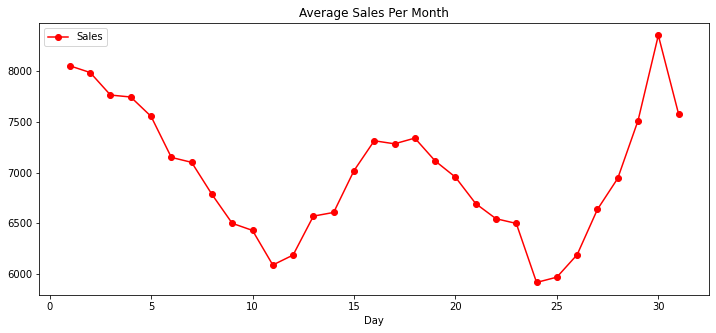

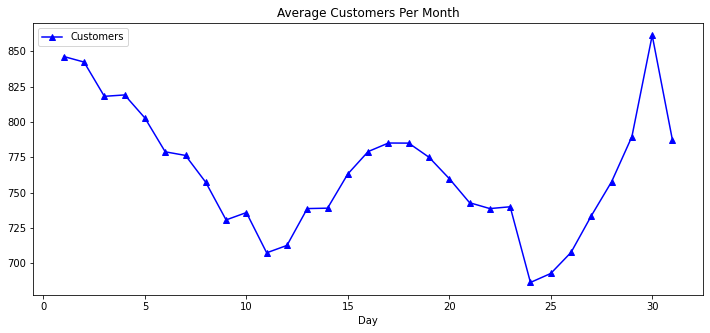

In [46]:
# Exploring Avg sales per Day of Month


axis = sales_df.groupby('Day')[['Sales']].mean().plot(figsize = (12,5), marker = 'o', color = 'r')
axis.set_title('Average Sales Per Month')
axis = sales_df.groupby('Day')[['Customers']].mean().plot(figsize = (12,5), marker = '^', color = 'b')
axis.set_title('Average Customers Per Month')

Text(0.5, 1.0, 'Average Customers Per Day of the Week')

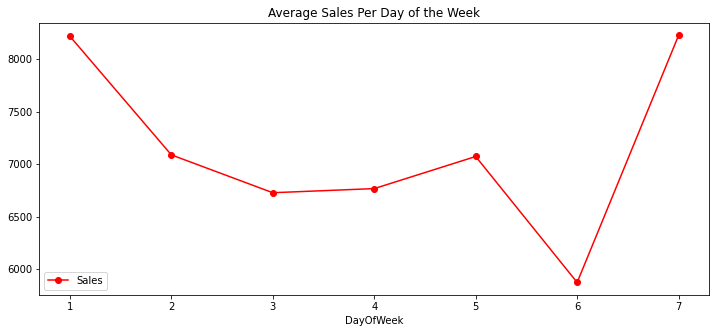

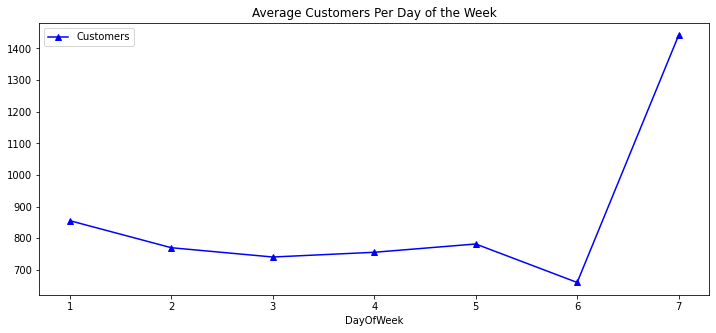

In [47]:
# Avg for day of a week

axis = sales_df.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (12,5), marker = 'o', color = 'r')
axis.set_title('Average Sales Per Day of the Week')

axis = sales_df.groupby('DayOfWeek')[['Customers']].mean().plot(figsize = (12,5), marker = '^', color = 'b')
axis.set_title('Average Customers Per Day of the Week')

<AxesSubplot:xlabel='Promo', ylabel='Customers'>

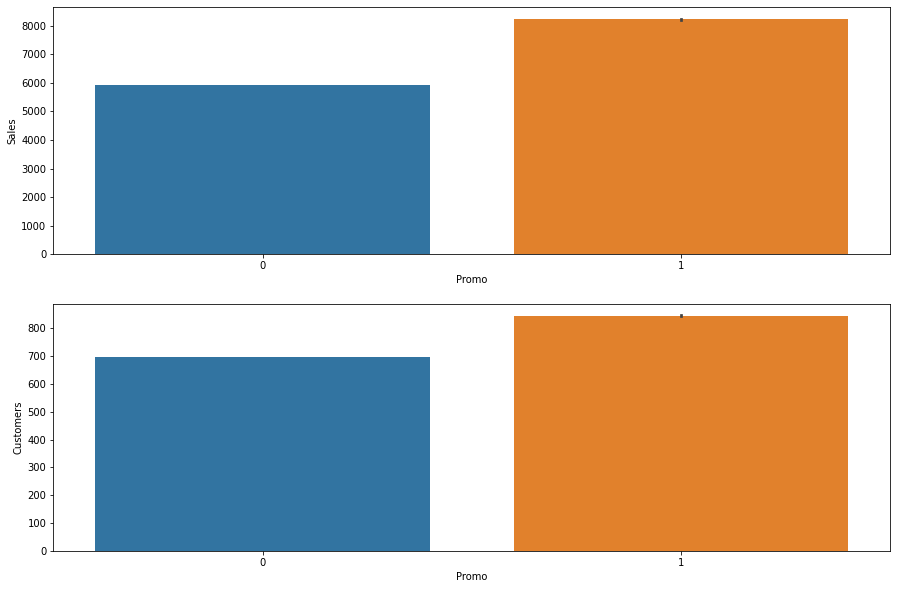

In [48]:
plt.figure(figsize=[15,10])

plt.subplot(211)
sns.barplot(x = 'Promo', y = 'Sales', data = sales_df)

plt.subplot(212)
sns.barplot(x = 'Promo', y = 'Customers', data = sales_df)

In [49]:
# Function that takes in the data frame, storeID, and number of future period forecast
# The function then generates date/sales columns in Prophet format
# The function then makes time series predictions
from prophet import Prophet

def sales_prediction(Store_ID, sales_df, periods):
    sales_df = sales_df[ sales_df['Store'] == Store_ID ]
    sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales':'y'})
    sales_df = sales_df.sort_values('ds')

    model    = Prophet()
    model.fit(sales_df)
    future   = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    figure   = model.plot(forecast, xlabel='Date', ylabel='Sales')
    figure2  = model.plot_components(forecast)

13:15:44 - cmdstanpy - INFO - Chain [1] start processing
13:15:44 - cmdstanpy - INFO - Chain [1] done processing


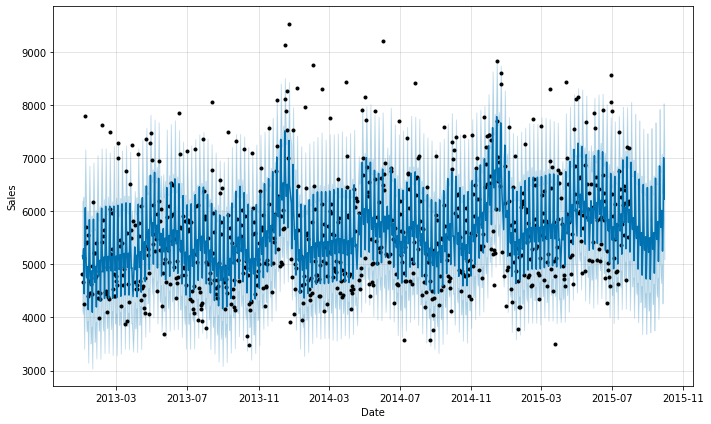

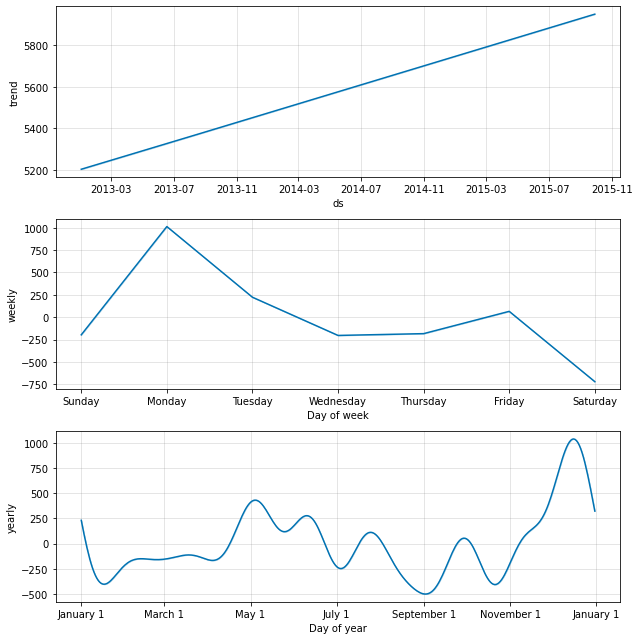

In [50]:
sales_prediction(10, sales_df, 60)

In [51]:
# Function that takes in the storeID and returns two date/sales columns in Prophet format
# Format data to fit prophet 
def sales_prediction(Store_ID, sales_df, holidays, periods):

    sales_df = sales_df[ sales_df['Store'] == Store_ID ]
    sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales':'y'})
    sales_df = sales_df.sort_values('ds')

    model    = Prophet(holidays = holidays)
    model.fit(sales_df)
    future   = model.make_future_dataframe(periods = periods)
    forecast = model.predict(future)
    figure   = model.plot(forecast, xlabel='Date', ylabel='Sales')
    figure2  = model.plot_components(forecast)

In [52]:
school_holidays = sales_df[sales_df['SchoolHoliday'] == 1].loc[:, 'Date'].values
school_holidays.shape

(163457,)

In [53]:
# Get all the dates pertaining to state holidays 
state_holidays = sales_df [ (sales_df['StateHoliday'] == 'a') | (sales_df['StateHoliday'] == 'b') | (sales_df['StateHoliday'] == 'c')  ].loc[:, 'Date'].values
state_holidays.shape

(910,)

In [54]:
state_holidays = pd.DataFrame({'ds': pd.to_datetime(state_holidays),
                               'holiday': 'state_holiday'})

In [55]:
school_holidays = pd.DataFrame({'ds': pd.to_datetime(school_holidays),
                                'holiday': 'school_holiday'})

In [56]:
school_state_holidays = pd.concat((state_holidays, school_holidays))

13:16:08 - cmdstanpy - INFO - Chain [1] start processing
13:16:08 - cmdstanpy - INFO - Chain [1] done processing


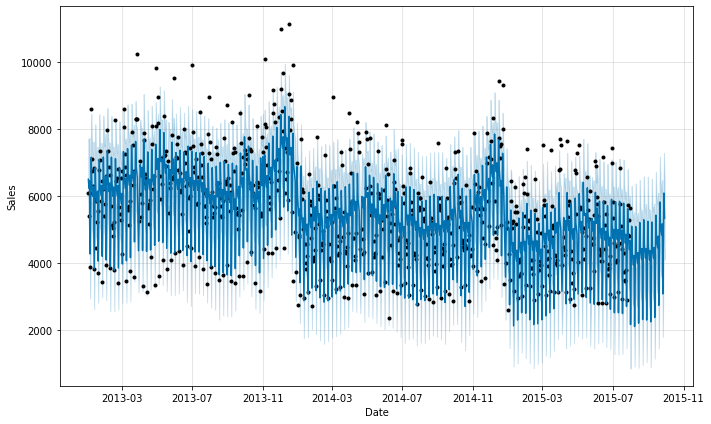

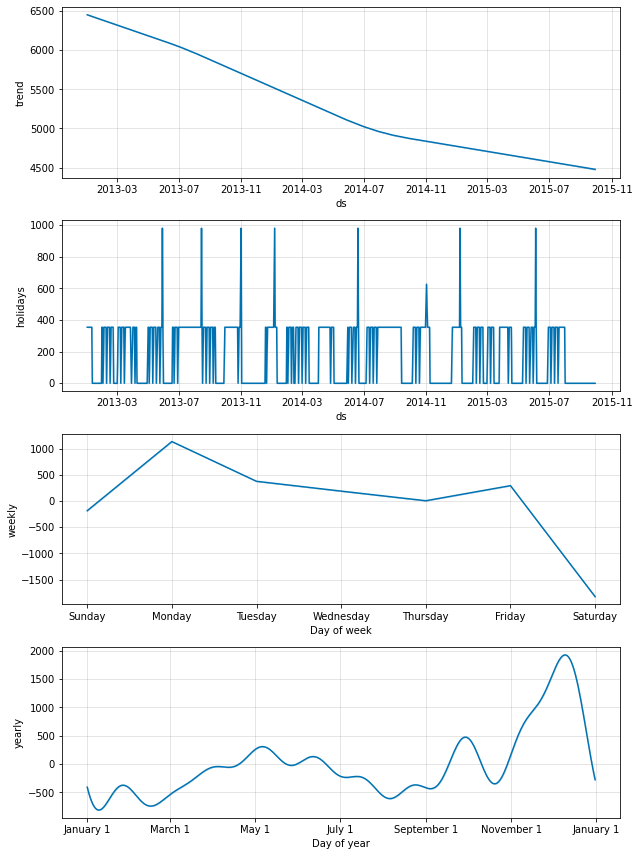

In [57]:
# predictions using holidays for a specific store
sales_prediction(6, sales_df, school_state_holidays, 60)